<a href="https://colab.research.google.com/github/ambika1us/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Capstone_Project_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H4><b>Project Name:</b> Netflix Movies and TV Shows Clustering</H4>
<H5><b>Project Type:</b> Unsupervised</H5>
<H5><b>Contribution:</b> Individual</H5>
<H5><b>Team Member:</b> Ambika Prasad Rath (ambika1us@gmail.com)</H5>

<h5><b>Project Summary:</b></h5><br>
<P>This dataset consists of TV shows and movies available as of 2019. The dataset is collected from flixable which is third party Netflix search engine in 2018. They released an interesting report which shows that the number of TV shows on netflix has nearly tripled since 2010. The streaming services number of movies has decreased by more than 2000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB rating, rotten tomatoes can also provide many interesting findings.</P>

<H5><b>GitHub Link:</b></H5>
<p>https://github.com/ambika1us/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING</p>

<h5><b>Problem Statement:</b></H5>
<p>This dataset consists of TV shows and movies available as of 2019. The dataset is collected from flixable which is third party Netflix search engine in 2018. They released an interesting report which shows that the number of TV shows on netfli9x has nearly tripled since 2010. The streaming services number of movies has decreased by more than 2000 titles since 2010, while its number of TV shows has nearly tripled. it will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB rating.</p>
<h6><b>Approch:</b></h6>
<p>Initiaqlly, in the 1st step imported the dataset to carryout the analysis over the dataset to comprehend the details of available data and checked for null values and treated them. Here, we found more than 30% null values in the director's column. Then, we take appropriate action for null values according to the circumstances.</p>
<p>Performed the exploratory data analysis and tried to get the understanding of the data and how the content is distributed in the dataset, its type and details such as which countries are watching more and which type of content is in demand etc. has been analyzed in this step with the help of visualization graph by getting insights from analysis.</p>

<h5><b>In this project, we are required to do:</b></h5>
<ol>
<li>Exploratory Data Analysis.</li>
<li>Understanding what type content is available in different countries.</li>
<li>Is Netflix has increasingly focusing on TV rather than movies in recent years.</li>
<li>Clustreing similar content by matching Text-Based features.</li>
</ol>

<H5><B>Attribute Information:</B></H5>
<ol>
<li><b>show_id:</b> UniqueID for every movie/TV show</li>
<li><b>type:</b> Identifier- A movie or TV show</li>
<li><b>title:</b> Title of the movie/TV show</li>
<li><b>director:</b> Director of the movie</li>
<li><b>cast:</b> Actors involved in the movie/show</li>
<li><b>country:</b> Country where the movie/show was produced</li>
<li><b>date_added:</b> Date it was added on Netflix</li>
<li><b>release_year:</b> Actual release year of the movie/show</li>
<li><b>rating:</b> TV rating of the movie/show</li>
<li><b>duration:</b> Total duration-in minutes or number of season</li>
<li><b>listed_in:</b> Genere</li>
<li><b>description:</b> The summary description</li>
</ol>

<h4><b>Steps Involved:</b></h4>
<p><b>Exploratory Data Analysis:</b> After loading the dataset we performed EDA. This process helped us figure out various aspects and relationships. It gave us a better idea of which feature behaves in which manner.</p>
<p><b>Null Values Treatment:</b> Our dataset contains many null values. we fill them with some other values and we also drop some of the them because null values might tend to disturb our model.</p>
<p><b>Standardization of features:</b> Our main motive through this step was to scale our data into a uniform format that would allow us to utilize the data in a better way while performing fitting and applying different algorithms to it. The basic goal was to enforce a level of consistency or uniforming to certain practices or operation within the selected environment.</p>

<b>Importing Libraries</b>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime
from numpy import math

import warnings
warnings.filterwarnings('ignore')

<b>Loading the Dataset</b>

In [2]:
#Mounting Google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the dataset
nfx=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_Unsupervised_Learning/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
#Top 5 Rows
nfx.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
#Checking the shape of dataset
nfx.shape

(7787, 12)

In [5]:
#Column Names
nfx.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#Information about the dataset
nfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


<b>Data Processing</b>

In [7]:
#Drop duplicates
nfx[nfx.duplicated()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


There are no duplicate values

<b>Handling Null Values</b>

In [8]:
#Checking Null Values
nfx.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
#Total Null Values
nfx.isnull().sum().sum()

3631

There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column, 507 null values in country column, 10 in date_added and 7 in rating, so, we need to handle the null values.

In [10]:
#Handling Null Values
nfx['cast'].fillna(value='No cast', inplace=True)
nfx['country'].fillna(value=nfx['country'].mode()[0], inplace=True)

In [11]:
#date_added and rating contains an insignificant portion of the data so we will drop them from the dataset
nfx.dropna(subset=['date_added','rating'], inplace=True)

In [12]:
#Droping Director column
nfx.drop(['director'],axis=1, inplace=True)

In [13]:
#Again checking is there any null values or not
nfx.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [17]:
#Add new Features
nfx['date_added']=pd.to_datetime(nfx['date_added'])
nfx['year_added']=nfx['date_added'].dt.year
nfx['month_added']=nfx['date_added'].dt.month

<h5><b>Exploratory Data Analysis</b></h5>

<h5>Analyze the type of content available on Netflix</h5>
<p>Analysis entire Netflix dataset consisting of both movies and shows. Let's compare the total number of movies and shows in this dataset to know which one is the majority.</p>

<p>Netflix content by Type</p>

In [14]:
#ploting for pie chart on type feature
x=nfx['type'].value_counts().reset_index()
colors=['DodgerBlue','PaleTurquoise']
fig=px.pie(x,title='Type of Netflix Contents',values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside',textinfo='percent+label',textfont_size=20,marker=dict(colors=colors,line=dict(color='#000000',width=2)))

<p><b>Observations:</b></p>
<ul>
<li>It is evident that there are more movies on Netflix than TV shows</li>
<li>Netflix has 5377 movies, which is more than double the quantity of TV shows</li>
<li>There are about 70% movies and 30% TV shows on Netflix</li>
</ul>

In [15]:
country=nfx['country'].value_counts().reset_index()
country=country[country['country']/country['country'].sum()>0.01]

fig=px.pie(country,values='country',names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside',textinfo='percent+label',marker=dict(line=dict(color='darkred',width=2)))
fig.show()

Text(0.5, 1.0, 'Total Releease for Last 10 Years')

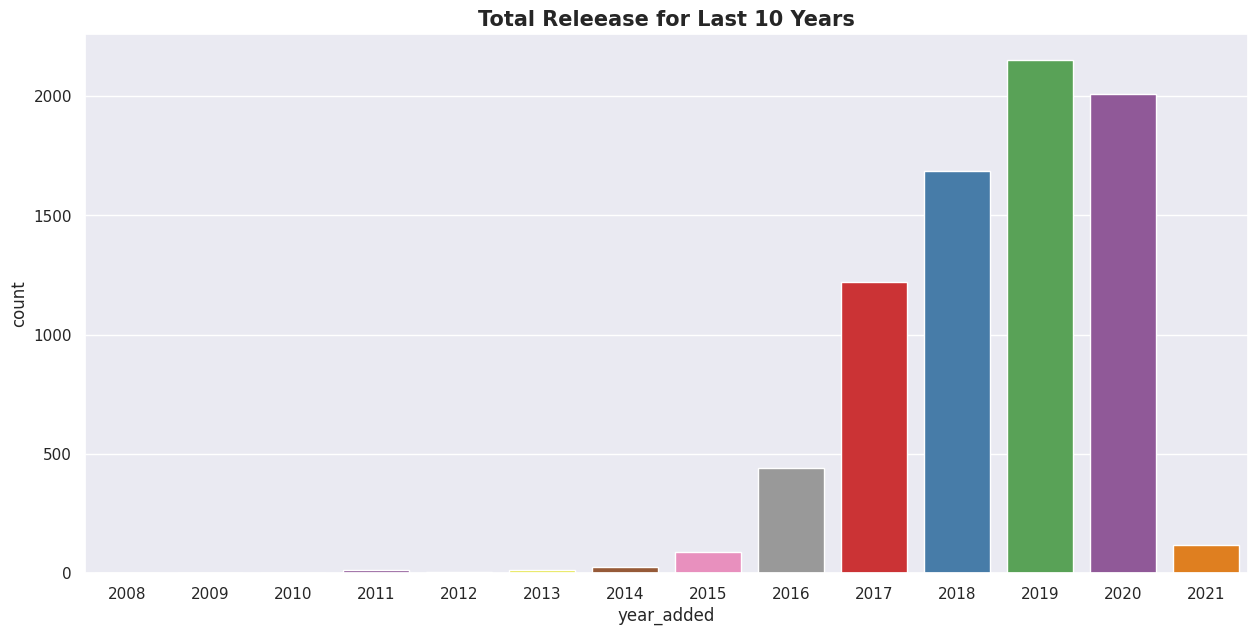

In [21]:
#Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=nfx,palette="Set1")
plt.title('Total Releease for Last 10 Years', size='15',fontweight="bold")